# Plot difference

In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import glob
from scipy.interpolate import griddata
import os
from shutil import copyfile
import re

# Working with directores and files
## Inside the directore must have the invdir, and data folders. If there is no a pngs folder, the code create it for you.

### Another example of path and files:
path_d = "/home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/"

data = [d for d in glob.glob(path_d + "data/*.stg")]


In [2]:
path_d = "/home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/"
data = [d for d in glob.glob(path_d + "data/*.stg")]

#path_d = "../Example_files/"
#data = [d for d in glob.glob(path_d + "data/*.tx0")]

In [3]:
if os.path.exists(path_d + "invdir/ref"):
    ref = path_d + "invdir/ref/f001_res.vtk" 
    copyfile(ref,path_d + "invdir/" + "f000_res.vtk") 
files = [f for f in glob.glob(path_d + "invdir/f???_res.vtk")]
files.sort()
data.sort()

if not os.path.exists(path_d + "pngs/dif"):
        os.makedirs(path_d + "pngs/dif")

pngs = [p for p in glob.glob(path_d + "pngs/*.png")]

In [4]:
# Define the colormap
number_of_color = 2**3 ## not being used. I need to understand better how control the number of colors in cmap & palete
#cmap = plt.cm.gist_earth  # define the colormap
cmap = plt.cm.seismic
#cmaplist = [cmap(i) for i in np.linspace(0,cmap.N+1,number_of_color)]
cmaplist = [cmap(i) for i in range(cmap.N)]
#cmaplist[0] = (0.0, 0.0, 0.0, 1.0)
cmaplist[0] = (.5, .5, .5, 1.0)
cmaplist[255] = (1.0, 1.0, 0.0, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

In [5]:
# Define the axes
fig_size = (14, 6)
axes2 = [0.93, 0.1, 0.02, 0.8] # palete

text_size = 12
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

mm = np.zeros(2)
mm[0] = 10000
ref={}
diff=[]
for w,f in enumerate(files):
    if(str(f) not in str(pngs)):
        with open(f,'r') as fh:
            a = ' '
            while 'POINTS' not in a:
                a = (fh.readline().strip())
            string = re.sub('double',' ',re.sub('POINTS',' ', a))
            nnodal = int(string)
            Nodal = []
            Elem = []
            rho_truelog = []
            rho = []
            S = []
            dump = fh.readlines()
            for i, line in enumerate(dump):
                if(i < nnodal):
                    Nodal.append(line.split())
                elif (i == nnodal):
                    n = line.split()
                elif (i < int(n[1])+nnodal+1):
                    Elem.append(line.split())
                elif(i < int(n[1])+nnodal+7):
                    f = line.split()
                elif(i < int(n[1])+nnodal+8):
                    rho = line.split()
                elif(i < int(n[1])+nnodal+10):
                    f = line.split()
                elif(i < int(n[1])+nnodal+11):
                    rho_truelog = line.split()
                elif(i < int(n[1])+nnodal+13):
                    f = line.split()
                elif(i < int(n[1])+nnodal+14):
                    dif = line.split()
                elif(i < int(n[1])+nnodal+16):
                    f = line.split()
                elif(i < int(n[1])+nnodal+17):
                    S = line.split()
        Elem = np.asarray(Elem).astype(int)
        Nodal = np.asarray(Nodal).astype(float)
        S = np.asarray(S).astype(float)
        rho_truelog = np.asarray(rho_truelog).astype(float)
        rho = np.asarray(rho).astype(float)
        
        if (w == 1):
            xmin = min(Nodal[:,0])
            xmax = max(Nodal[:,0]) 
            ymin = min(Nodal[:,1]) #+ ?
            ymax = max(Nodal[:,1]) + 0.5 
        
        for i,e in enumerate(Elem):
            
            index1 = int(e[1]) 
            index2 = int(e[2])
            index3 = int(e[3])
            
            polygon = ((Nodal[index1,0], Nodal[index1,1]), \
                       (Nodal[index2,0],Nodal[index2,1]), \
                       (Nodal[index3,0], Nodal[index3,1]), \
                       (Nodal[index1,0], Nodal[index1,1]))
            
            if(w == 0):
                ref.update({polygon:rho[i]})
            
            diff.append(100.0* ( float(rho[i]) - float(ref[polygon])) / float(ref[polygon])  )
            #diff.append( float(rho[i]) - float(ref[polygon]) )        

# Choose mm (values min and max) based on your data

Mean:  -3.209522469671833 3.7199529725151956
Std:  2.531701866591265 4.207963277112754


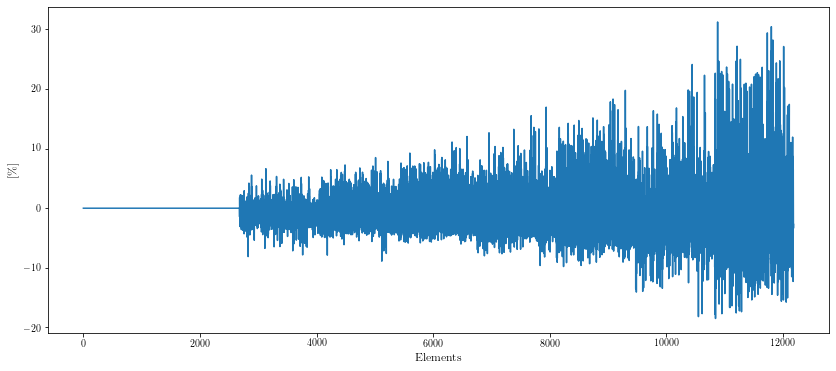

In [6]:
fig, ax = plt.subplots(1, 1, figsize = fig_size)
plt.plot(diff)
ax.set_ylabel("[$\%$]",size=text_size)
ax.set_xlabel("Elements",size=text_size)
a=np.asarray(diff)
print("Mean: ",a[a<0].mean(), a[a>0].mean())
print("Std: ",a[a<0].std(), a[a>0].std())

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f000_res.vtk
0 4125


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


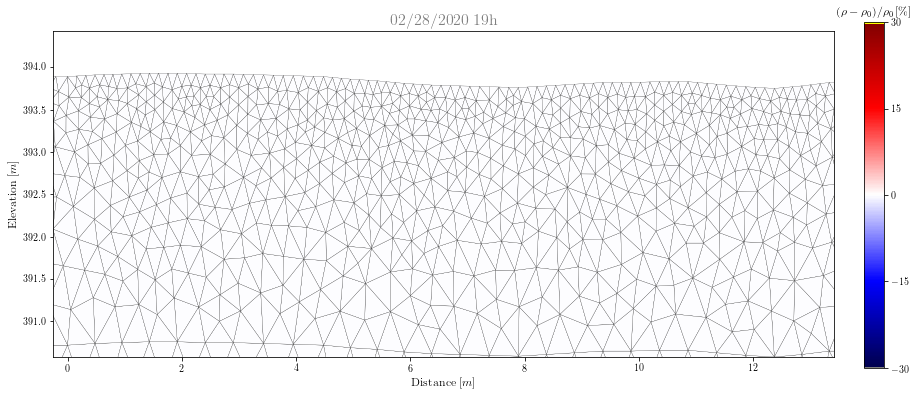

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f001_res.vtk
1 2121


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


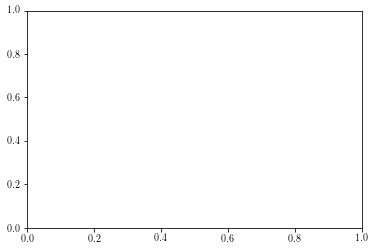

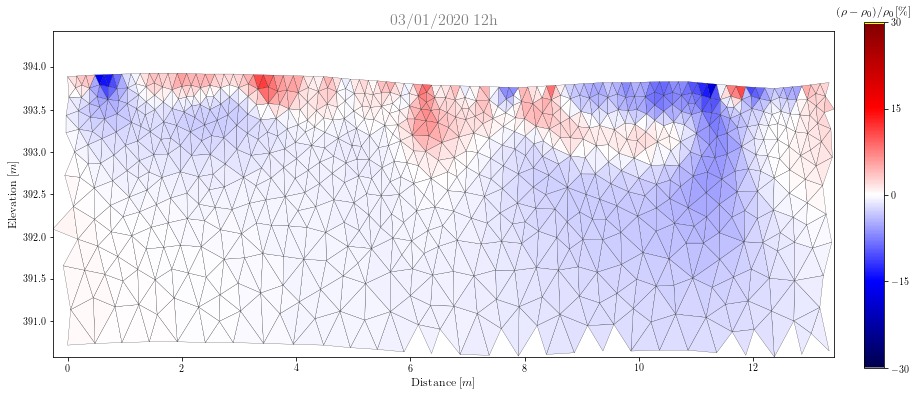

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f002_res.vtk
2 2121


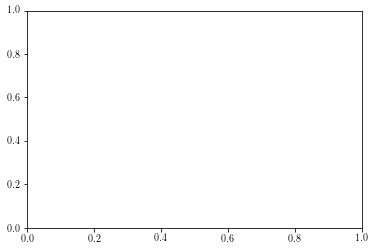

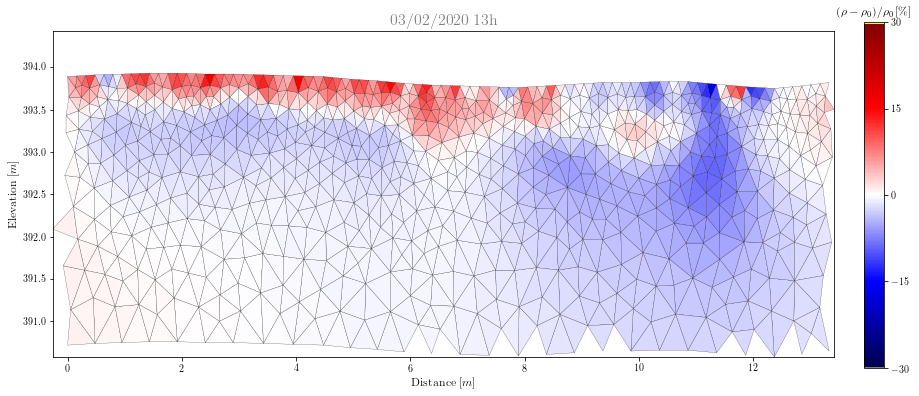

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f003_res.vtk
3 2121


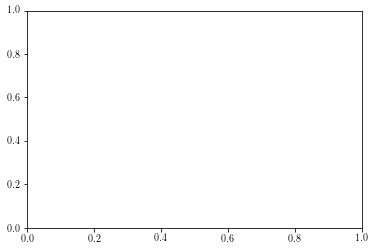

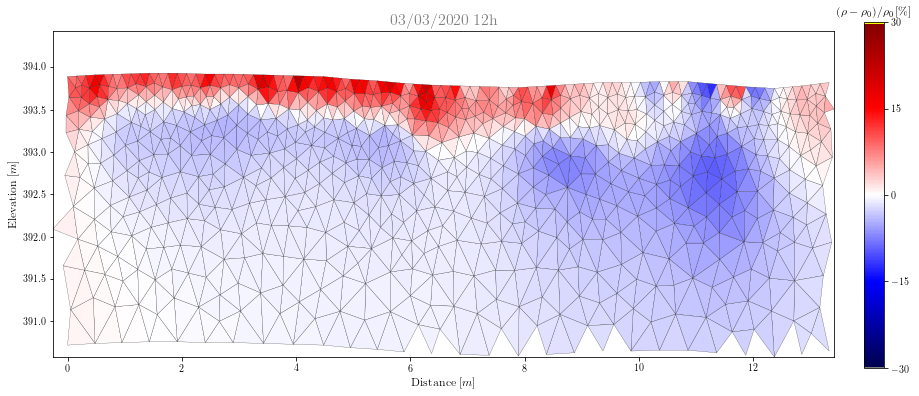

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f004_res.vtk
4 2121


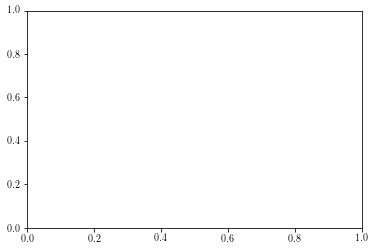

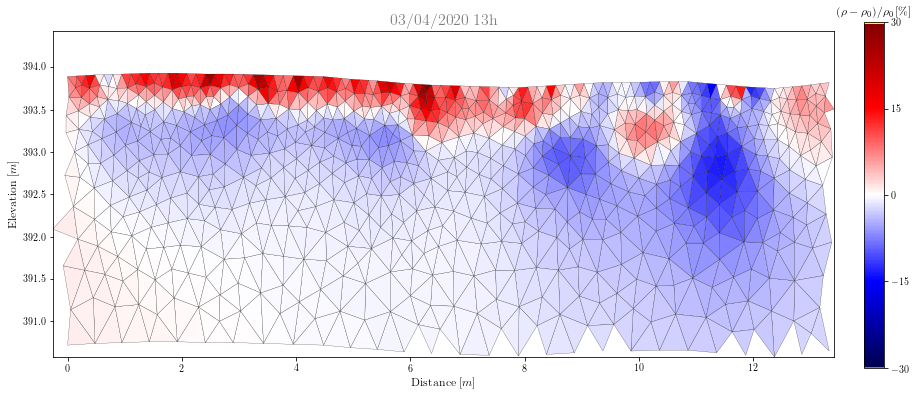

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f005_res.vtk
5 2121


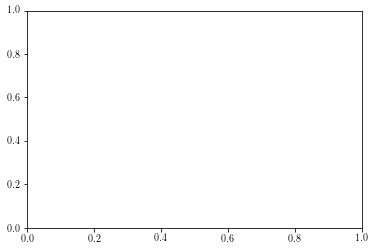

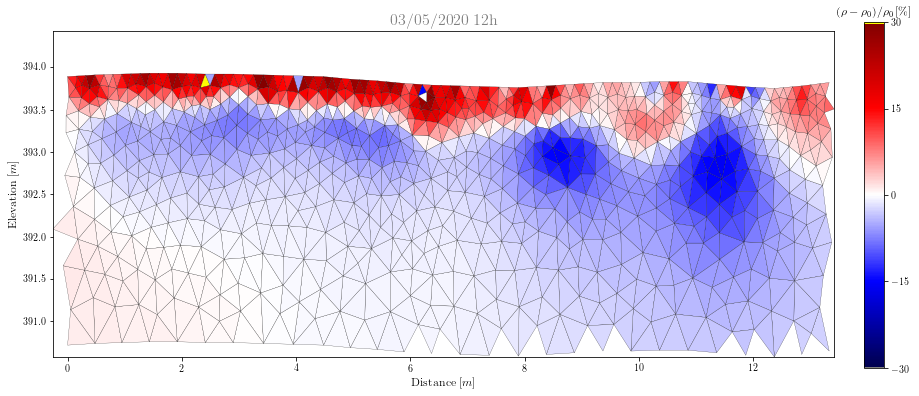

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f006_res.vtk
6 2121


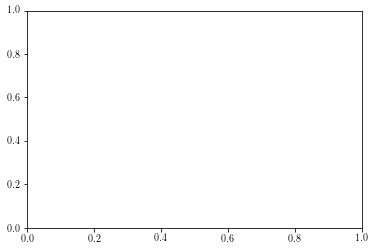

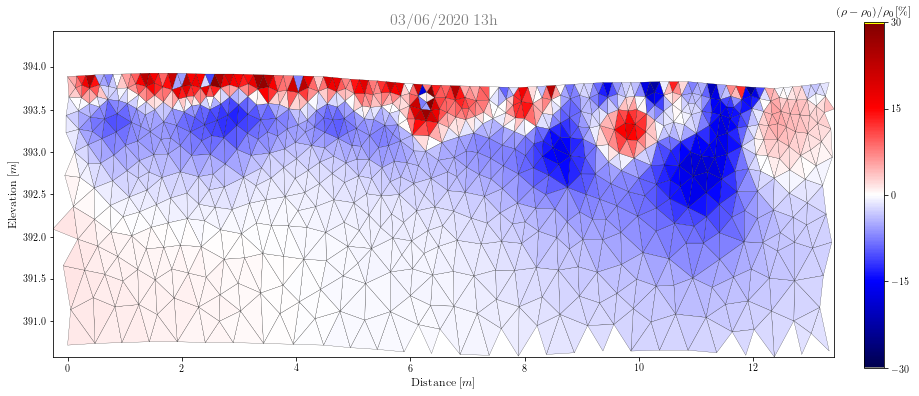

Working on /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/invdir/f007_res.vtk
7 2121


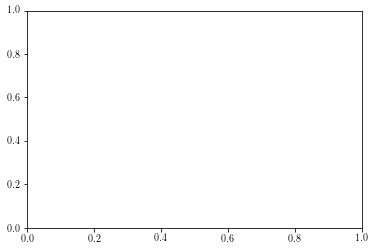

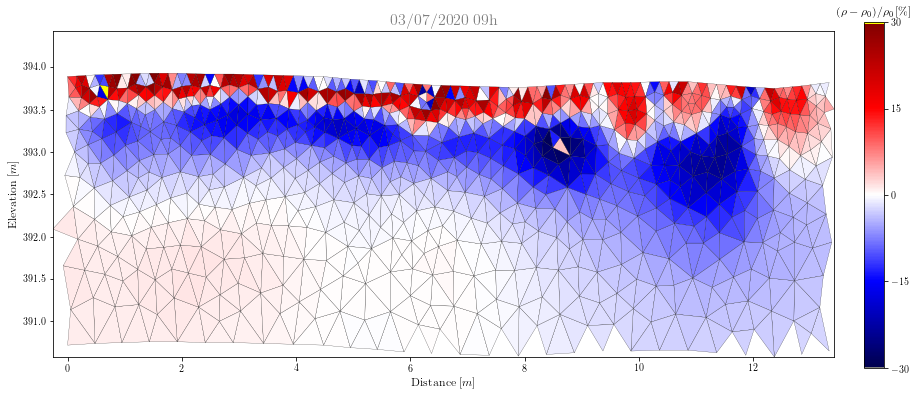



Images saved in /home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/test1/pngs/dif/


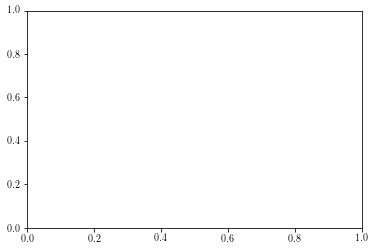

In [7]:
ref = {}
mm = [-30, 30]
bounds = np.linspace(mm[0], mm[1], cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
for w,f in enumerate(files):
    if(str(f) not in str(pngs)):
        print("Working on " + f)
                
        fig, ax = plt.subplots(1, 1, figsize = fig_size)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        ax.set_xlabel("Distance [$m$]",size=text_size)
        ax.set_ylabel("Elevation [$m$]",size=text_size)
       
        with open(f,'r') as fh:
            a = ' '
            while 'POINTS' not in a:
                a = (fh.readline().strip())
            string = re.sub('double',' ',re.sub('POINTS',' ', a))
            nnodal = int(string)
            Nodal = []
            Elem = []
            rho_truelog = []
            rho = []
            S = []
            dump = fh.readlines()
            for i, line in enumerate(dump):
                if(i < nnodal):
                    Nodal.append(line.split())
                elif (i == nnodal):
                    n = line.split()
                elif (i < int(n[1])+nnodal+1):
                    Elem.append(line.split())
                elif(i < int(n[1])+nnodal+7):
                    f = line.split()
                elif(i < int(n[1])+nnodal+8):
                    rho = line.split()
                elif(i < int(n[1])+nnodal+10):
                    f = line.split()
                elif(i < int(n[1])+nnodal+11):
                    rho_truelog = line.split()
                elif(i < int(n[1])+nnodal+13):
                    f = line.split()
                elif(i < int(n[1])+nnodal+14):
                    dif = line.split()
                    print(w,i)
                elif(i < int(n[1])+nnodal+16):
                    f = line.split()
                elif(i < int(n[1])+nnodal+17):
                    S = line.split()
        Elem = np.asarray(Elem).astype(int)
        Nodal = np.asarray(Nodal).astype(float)
        S = np.asarray(S).astype(float)
        rho_truelog = np.asarray(rho_truelog).astype(float)
        rho = np.asarray(rho).astype(float)
       
        for i,e in enumerate(Elem):
            
            index1 = int(e[1]) 
            index2 = int(e[2])
            index3 = int(e[3])
            
            polygon = ((Nodal[index1,0], Nodal[index1,1]), \
                       (Nodal[index2,0],Nodal[index2,1]), \
                       (Nodal[index3,0], Nodal[index3,1]), \
                       (Nodal[index1,0], Nodal[index1,1]))
            
            if(w == 0):
                ref.update({polygon:rho[i]})
            
            indexC = float(rho[i]) - float(ref[polygon])   
            indice = int( (indexC - mm[0])*len(cmaplist) / (mm[1] - mm[0])) - 1
            
            if (indice > 255):
                indice = 255;
            elif(indice < 0):
                indice = 0
            else:
                plotC = cmaplist[indice]  
                        
            codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]#patches.append(polygon)
            path = Path(polygon,codes)
       
            patch = patches.PathPatch(path, facecolor=plotC, edgecolor=None, lw=0.2)
            ax.add_patch(patch)

        ax2 = fig.add_axes(axes2)
        #ax2.set_ylabel('Resistivity [$\Omega m$]',size=text_size)
        ax2.set_title('$ (\\rho - \\rho_0) /\\rho_0 \, [\%]$',size=text_size)
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=[np.linspace(np.around(mm[0]),np.around(mm[1]),5)], boundaries=bounds)
       
        fname = path_d + 'pngs/dif/' + re.sub(path_d,' ',data[w])[6:-3] + 'png'
        title = re.sub(path_d,' ',fname)[6:-4]
        ax.set_title(title[9:11] + '/' + title[12:14] + '/' + title[4:8] + ' ' + title[15:17] + 'h',fontsize=16, color='gray')
        plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
        plt.show()
        plt.close(fig)
        plt.clf()
        plt.cla()
print("\n\nImages saved in " + path_d + 'pngs/dif/')